In [1]:
#Keras Model Visualization

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input
import os
import numpy as np
import matplotlib.pyplot as plt
batchsize = 128
NUM_EPOCHS = 10
img_width, img_height = 150, 150

Using TensorFlow backend.


In [2]:
train_dir = 'furniture_images/train'
val_dir = 'furniture_images/val'

train_bed_dir = os.path.join(train_dir, 'bed') 
train_chair_dir = os.path.join(train_dir, 'chair')  
train_sofa_dir = os.path.join(train_dir, 'sofa') 
val_bed_dir = os.path.join(val_dir, 'bed')  
val_chair_dir = os.path.join(val_dir, 'chair')  
val_sofa_dir = os.path.join(val_dir, 'sofa')  


In [111]:
num_bed_train = len(os.listdir(train_bed_dir))
num_chair_train = len(os.listdir(train_chair_dir))
num_sofa_train = len(os.listdir(train_sofa_dir))

num_bed_val = len(os.listdir(val_bed_dir))
num_chair_val = len(os.listdir(val_chair_dir))
num_sofa_val = len(os.listdir(val_sofa_dir))

num_train_images = num_bed_train + num_chair_train + num_sofa_train
num_val_images = num_bed_val + num_chair_val + num_sofa_val
print(num_train_images, num_val_images)

1351 156


In [4]:
train_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batchsize)

Found 1352 images belonging to 3 classes.


In [5]:
val_datagen =  ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=90,
      horizontal_flip=True,
      vertical_flip=True
    )

val_generator = val_datagen.flow_from_directory(val_dir, 
                                                    target_size=(img_height, img_width), 
                                                    batch_size=batchsize)

Found 156 images belonging to 3 classes.


In [6]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


In [7]:
model = Sequential([
    Conv2D(96, 11, padding='valid', activation='relu', 
           input_shape=(img_height, img_width ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(256, 5, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(384, 3, padding='same', activation='relu'),
    Conv2D(384, 3, padding='same', activation='relu'),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(1024, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dense(3)
])


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 140, 140, 96)      34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 70, 70, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 70, 70, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 70, 70, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 35, 35, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 35, 35, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 35, 35, 384)       1

In [10]:
history = model.fit(train_generator,epochs=NUM_EPOCHS,steps_per_epoch=num_train_images // batchsize,validation_data=val_generator, validation_steps=num_val_images // batchsize)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 10 steps, validate for 1 steps
Epoch 1/10
10/10 [==============================] - 239s 24s/step - loss: 13.7108 - accuracy: 0.6609 - val_loss: 0.6779 - val_accuracy: 0.6667
Epoch 2/10
10/10 [==============================] - 237s 24s/step - loss: 0.6559 - accuracy: 0.6708 - val_loss: 0.5836 - val_accuracy: 0.6693
Epoch 3/10
10/10 [==============================] - 227s 23s/step - loss: 0.5620 - accuracy: 0.7130 - val_loss: 0.5489 - val_accuracy: 0.7266
Epoch 4/10
10/10 [==============================] - 229s 23s/step - loss: 0.5243 - accuracy: 0.7334 - val_loss: 0.5041 - val_accuracy: 0.7292
Epoch 5/10
10/10 [==============================] - 226s 23s/step - loss: 0.5212 - accuracy: 0.7342 - val_loss: 0.4877 - val_accuracy: 0.7526
Epoch 6/10
10/10 [==============================] - 226s 23s/step - loss: 0.4897 - accuracy: 0.7653 - val_loss: 0.4626 - val_accuracy: 0.7604
Epoch 7/10
10/10 [==============================] - 227s

In [17]:
print(len(model.layers))

16


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 150, 150, 3)


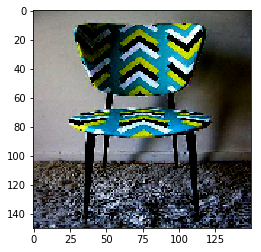

In [107]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

img_path = 'furniture_images/test/chair/00000800testchair.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = preprocess_input(img_tensor)

featuremap = model.predict(img_tensor)
plt.imshow(featuremap)
plt.imshow(img_tensor[0])
print (img_tensor.shape)

In [108]:
from tensorflow.keras.models import Model
layer_outputs = [layer.output for layer in model.layers[:16]]
activation_modelfig = Model(inputs=model.input, outputs=layer_outputs)
activationsfig = activation_modelfig.predict(img_tensor)

(1, 140, 140, 96)


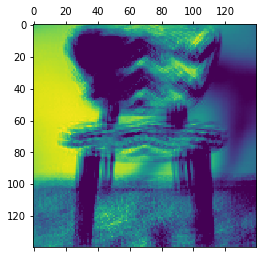

In [109]:
first_layer_activation = activationsfig[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 95], cmap='viridis')

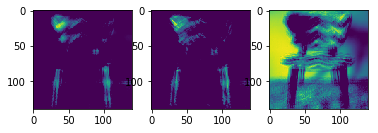

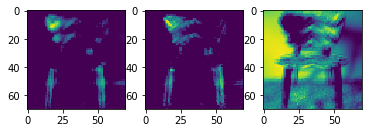

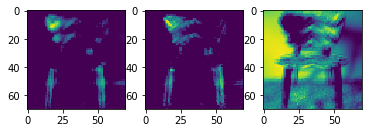

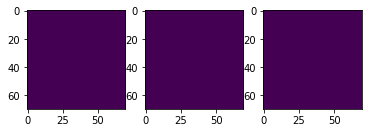

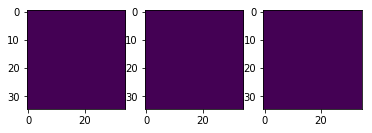

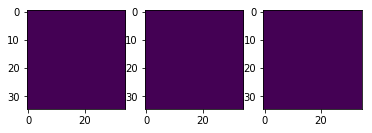

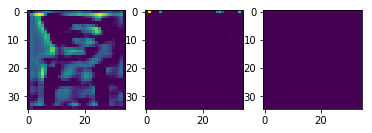

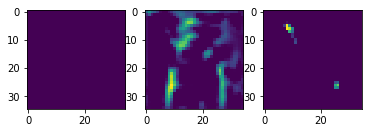

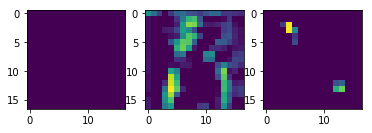

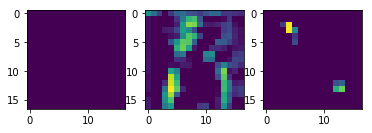

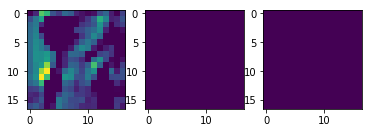

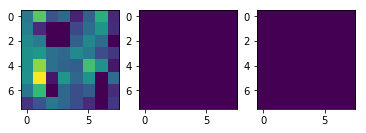

In [110]:
for i in range(0,12):
    current_layer_activation = activationsfig[i]
    ns = current_layer_activation.shape[-1]
    fig = plt.figure()
    ax1 = fig.add_subplot(131)
    plt.subplot(131)
    plt.imshow(current_layer_activation[0, :, :, 0], cmap='viridis')
    
    ax3 = fig.add_subplot(132)
    plt.subplot(132)
    plt.imshow(current_layer_activation[0, :, :, int(ns/2)], cmap='viridis')
    
    ax5 = fig.add_subplot(133)
    plt.subplot(133)
    plt.imshow(current_layer_activation[0, :, :, ns-1], cmap='viridis')
    